# Thyroid prediction

   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  r

c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1328
           1       0.67      0.57      0.62        21
           2       0.33      0.10      0.15        10
           3       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         0
           9       0.90      0.88      0.89        40
          10       0.00      0.00      0.00         1
          11       0.91      0.43      0.59        69
          12       0.00      0.00      0.00         1
          13       1.00      0.50      0.67         6
          16       0.75      0.51      0.61        82
          17       0.00      0.00      0.00        12
          18       0.81      0.67      0.73       106
          19       0.00      0.00      0.00         2
          20       0.55      0.21      0.31        28
          22       0.83      0.60      0.70        25
          24       1.00      0.33      0.50         6
      

c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packag

SVM:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1328
           1       0.69      0.52      0.59        21
           2       0.75      0.30      0.43        10
           3       0.00      0.00      0.00         4
           9       0.89      0.85      0.87        40
          10       0.00      0.00      0.00         1
          11       0.88      0.20      0.33        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         6
          16       0.84      0.46      0.60        82
          17       0.00      0.00      0.00        12
          18       0.79      0.54      0.64       106
          19       0.00      0.00      0.00         2
          20       0.75      0.11      0.19        28
          22       1.00      0.16      0.28        25
          24       0.00      0.00      0.00         6
          25       0.67      0.60      0.63        20
          26       0.0

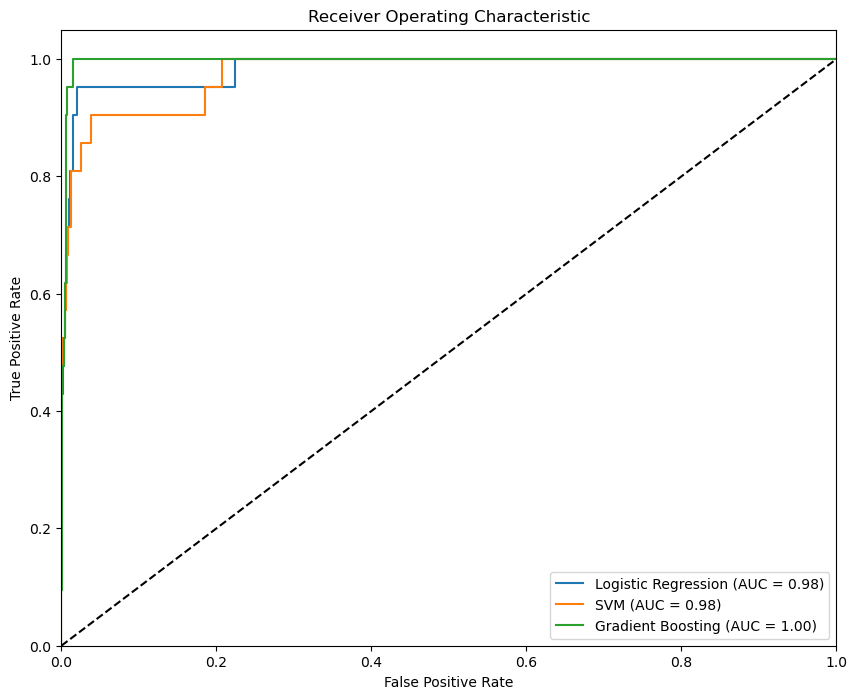

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('thyroidDF.csv')

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Handle missing values
# Option 1: Drop rows with NaNs
# data.dropna(inplace=True)

# Option 2: Fill NaNs with the mean or median for numerical columns
# For demonstration, we use median here; adjust based on your dataset
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Separate features and target variable
X = data.drop(columns=['target'])  # Replace 'target' with the actual name of your target column
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
gb_model = GradientBoostingClassifier()

# Fit the models
models = [logistic_model, svm_model, gb_model]
labels = ['Logistic Regression', 'SVM', 'Gradient Boosting']

for model in models:
    model.fit(X_train_scaled, y_train)

# Predictions and evaluation
for model, label in zip(models, labels):
    y_pred = model.predict(X_test_scaled)
    print(f"{label}:\n{classification_report(y_test, y_pred)}")

# Function to plot ROC curves
def plot_roc_curves(models, X_test, y_test, labels):
    plt.figure(figsize=(10, 8))
    for model, label in zip(models, labels):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Change to pos_label=1 for binary classification
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curves
plot_roc_curves(models, X_test_scaled, y_test, labels)


In [3]:
# Load your dataset
data = pd.read_csv('thyroidDF.csv')

# Display the first few rows of the dataset
print(data.head())

   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  r

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [6]:
# Preprocess the data
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Handle missing values
# Option 1: Drop rows with NaNs
# data.dropna(inplace=True)

# Option 2: Fill NaNs with the mean or median for numerical columns
# For demonstration, we use median here; adjust based on your dataset
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

In [7]:
# Separate features and target variable
X = data.drop(columns=['target'])  # Replace 'target' with the actual name of your target column
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
gb_model = GradientBoostingClassifier()

In [8]:
# Fit the models
models = [logistic_model, svm_model, gb_model]
labels = ['Logistic Regression', 'SVM', 'Gradient Boosting']
logistic_model = LogisticRegression(solver='liblinear', max_iter=200)

for model in models:
    model.fit(X_train_scaled, y_train)

# Predictions and evaluation
for model, label in zip(models, labels):
    y_pred = model.predict(X_test_scaled)
    print(f"{label}:\n{classification_report(y_test, y_pred)}")

c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1328
           1       0.67      0.57      0.62        21
           2       0.33      0.10      0.15        10
           3       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         0
           9       0.90      0.88      0.89        40
          10       0.00      0.00      0.00         1
          11       0.91      0.43      0.59        69
          12       0.00      0.00      0.00         1
          13       1.00      0.50      0.67         6
          16       0.75      0.51      0.61        82
          17       0.00      0.00      0.00        12
          18       0.81      0.67      0.73       106
          19       0.00      0.00      0.00         2
          20       0.55      0.21      0.31        28
          22       0.83      0.60      0.70        25
          24       1.00      0.33      0.50         6
      

c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\Lib\site-packag

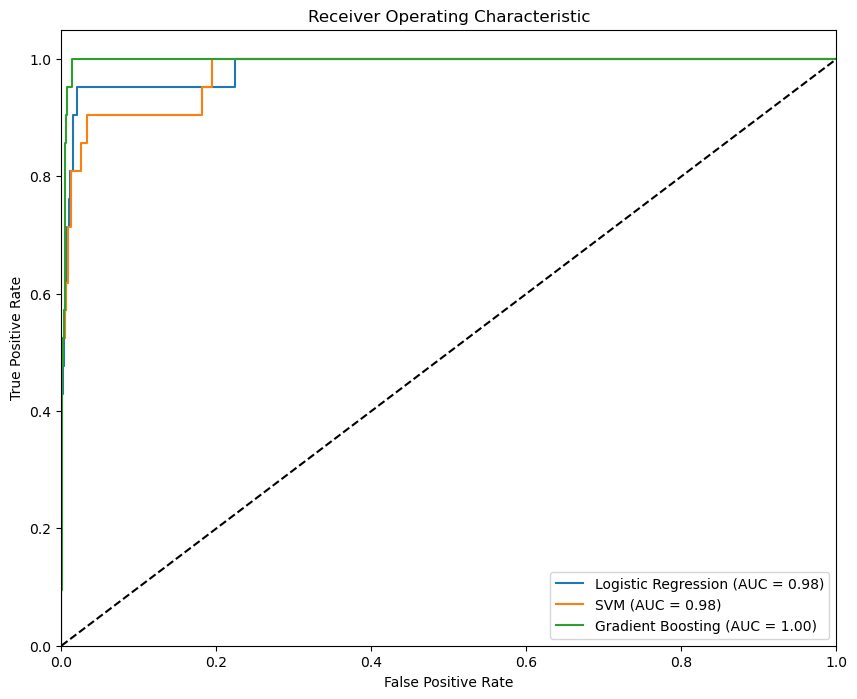

In [9]:
# Function to plot ROC curves
def plot_roc_curves(models, X_test, y_test, labels):
    plt.figure(figsize=(10, 8))
    for model, label in zip(models, labels):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Change to pos_label=1 for binary classification
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curves
plot_roc_curves(models, X_test_scaled, y_test, labels)